In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import json


In [ ]:
result = pd.read_csv("./results.csv")
result = result[["task", "llama-3.1-8b", "llama-3.1-70b", "llama-3.2-1b", "llama-3.2-3b", "phi-35",
                "gpt-3.5", "GPT-4-turbo", "gpt-4o", "gpt-4o-mini"]]

In [ ]:
result_nocot = result[0:16]
result_cot = result[16:]

In [ ]:
result_cot.reset_index(inplace=True)
result_cot

In [ ]:
base = result_nocot.loc[5].tolist()[1:]
fewshot = result_nocot.loc[6].tolist()[1:]
cot = result_cot.loc[5].tolist()[1:]

In [64]:
result_nocot

,task,llama-3.1-8b,llama-3.1-70b,llama-3.2-1b,llama-3.2-3b,phi-35,gpt-3.5,GPT-4-turbo,gpt-4o,gpt-4o-mini
0,CBS-Chain10,23.61,77.78,8.33,9.72,8.33,16.67,90.00,62.50,22.22
1,CBS-Chain4,52.78,91.67,16.67,22.22,16.67,38.89,100.00,88.89,52.78
2,CBS-Chain2,70.83,95.83,25.00,25.00,25.00,58.33,100.00,100.00,58.33
3,CBS-ToyCTF,16.67,44.44,16.67,16.67,16.67,16.67,46.67,50.00,19.44
4,CBS-Tiny,50.00,75.00,50.00,50.00,50.00,50.00,90.00,100.00,50.00
5,Spam Text,88.00,96.80,42.00,83.40,87.00,94.20,93.40,93.60,91.40
6,Spam Text-4shot,95.00,97.40,32.00,87.20,71.40,86.80,97.00,96.80,95.20
7,Spam Web,77.20,83.00,30.00,67.00,66.80,85.80,83.20,90.00,88.80
8,Spam Web-2shot,76.67,85.40,24.00,64.40,65.40,76.80,84.00,91.80,88.40
9,Vulnerability,49.60,50.60,48.60,46.60,45.00,48.00,58.20,55.00,47.60


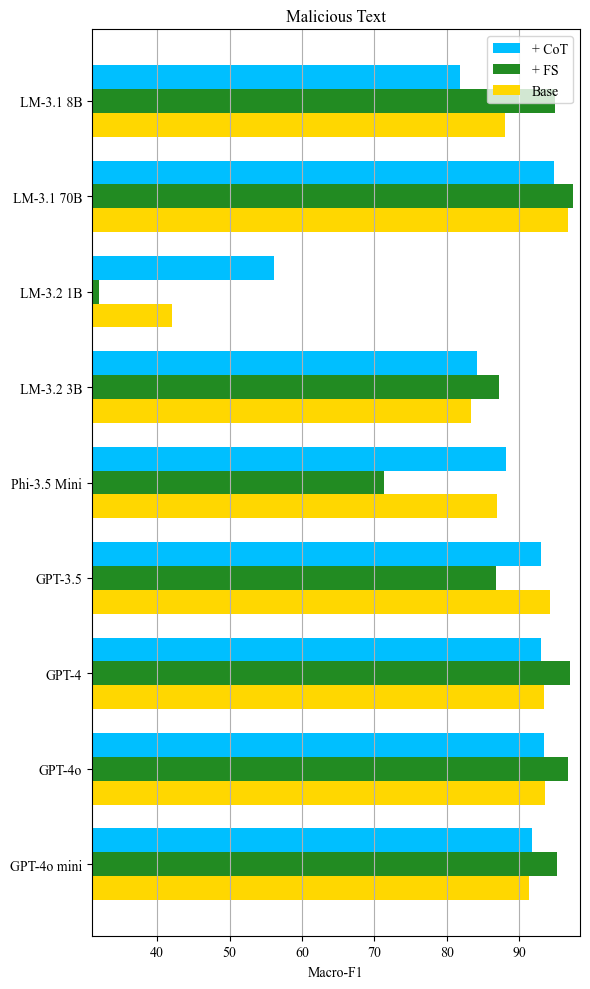

In [61]:
import pandas
import matplotlib.pyplot as plt
import numpy as np


# font is Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

graph=["LM-3.1 8B","LM-3.1 70B", "LM-3.2 1B", "LM-3.2 3B", "Phi-3.5 Mini", "GPT-3.5", "GPT-4","GPT-4o", "GPT-4o mini"]
graph = graph[::-1]

base = result_nocot.loc[5].tolist()[1:]
base = base[::-1]
fewshot = result_nocot.loc[6].tolist()[1:]
fewshot = fewshot[::-1]
cot = result_cot.loc[5].tolist()[2:]
cot = cot[::-1]

all_v = base + fewshot + cot
min_v = min(all_v)
max_v = max(all_v)

ind = np.arange(len(graph))
width = 0.25

fig, ax = plt.subplots(figsize=(6, 10))

ax.barh(ind+ 2* width, cot, width, color='deepskyblue', label='+ CoT')
ax.barh(ind + width, fewshot, width, color='forestgreen', label='+ FS')
ax.barh(ind, base, width, color='gold', label='Base')


ax.set(yticks=ind + width, yticklabels=graph, ylim=[2*width - 1, len(graph)])
ax.set(xlim=(min_v-1, max_v+1))
# ax.tick_params(axis="y", labelrotation=-30)
ax.legend()
ax.grid(axis = 'x')
ax.set_xlabel("Macro-F1")
plt.title("Malicious Text")

plt.tight_layout()

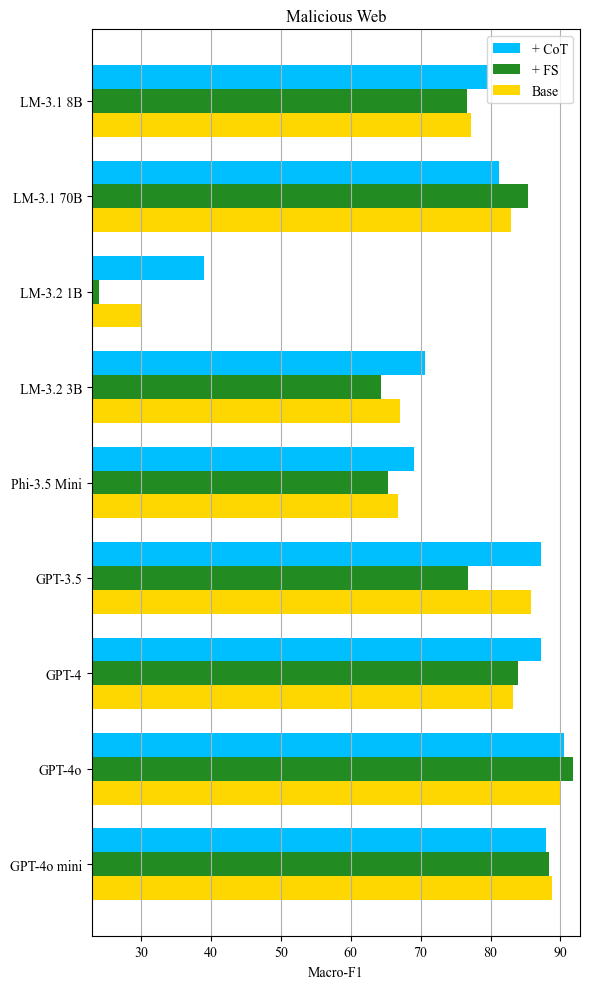

In [63]:
graph=["LM-3.1 8B","LM-3.1 70B", "LM-3.2 1B", "LM-3.2 3B", "Phi-3.5 Mini", "GPT-3.5", "GPT-4","GPT-4o", "GPT-4o mini"]
graph = graph[::-1]

base = result_nocot.loc[7].tolist()[1:]
base = base[::-1]
fewshot = result_nocot.loc[8].tolist()[1:]
fewshot = fewshot[::-1]
cot = result_cot.loc[7].tolist()[2:]
cot = cot[::-1]

all_v = base + fewshot + cot
min_v = min(all_v)
max_v = max(all_v)

ind = np.arange(len(graph))
width = 0.25

fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(ind+ 2* width, cot, width, color='deepskyblue', label='+ CoT')
ax.barh(ind + width, fewshot, width, color='forestgreen', label='+ FS')
ax.barh(ind, base, width, color='gold', label='Base')

ax.set(yticks=ind + width, yticklabels=graph, ylim=[2*width - 1, len(graph)])
ax.set(xlim=(min_v-1, max_v+1))
ax.grid(axis = 'x')
ax.set_xlabel("Macro-F1")
# ax.tick_params(axis="y", labelrotation=-30)
ax.legend(loc="upper right")
plt.title("Malicious Web")

plt.tight_layout()

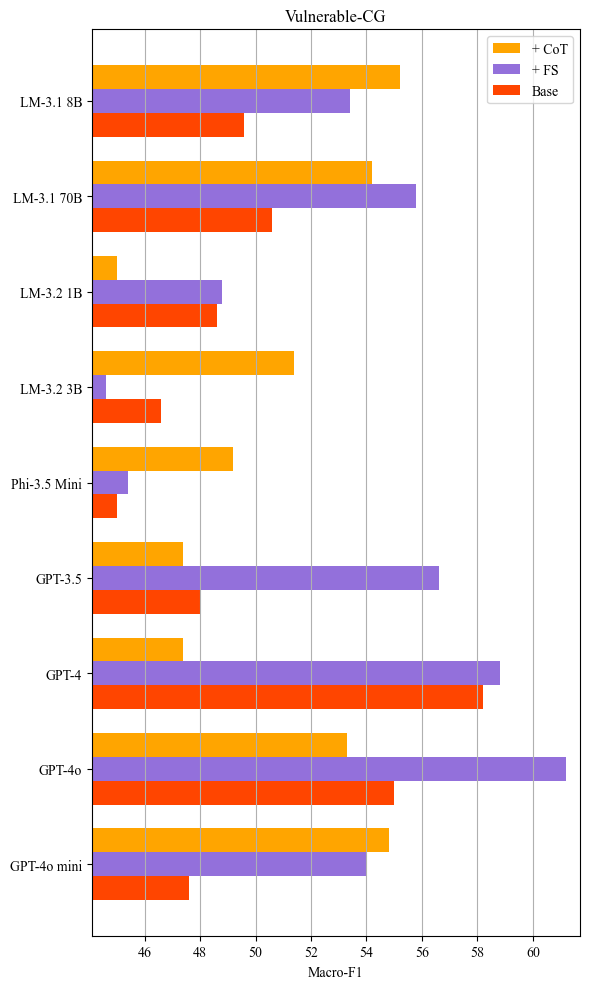

In [75]:
graph=["LM-3.1 8B","LM-3.1 70B", "LM-3.2 1B", "LM-3.2 3B", "Phi-3.5 Mini", "GPT-3.5", "GPT-4","GPT-4o", "GPT-4o mini"]
graph = graph[::-1]

base = result_nocot.loc[9].tolist()[1:]
base = base[::-1]
fewshot = result_nocot.loc[10].tolist()[1:]
fewshot = fewshot[::-1]
cot = result_cot.loc[9].tolist()[2:]
cot = cot[::-1]

all_v = base + fewshot + cot
min_v = min(all_v)
max_v = max(all_v)

ind = np.arange(len(graph))
width = 0.25

fig, ax = plt.subplots(figsize=(6, 10))

ax.barh(ind+ 2* width, cot, width, color='orange', label='+ CoT')
ax.barh(ind + width, fewshot, width, color='mediumpurple', label='+ FS')
ax.barh(ind, base, width, color='orangered', label='Base')


ax.set(yticks=ind + width, yticklabels=graph, ylim=[2*width - 1, len(graph)])
ax.set(xlim=(min_v-0.5, max_v+0.5))
ax.grid(axis = 'x')
ax.set_xlabel("Macro-F1")
plt.title("Vulnerable-CG")

# ax.tick_params(axis="y", labelrotation=-30)
ax.legend(loc="upper right")

plt.tight_layout()

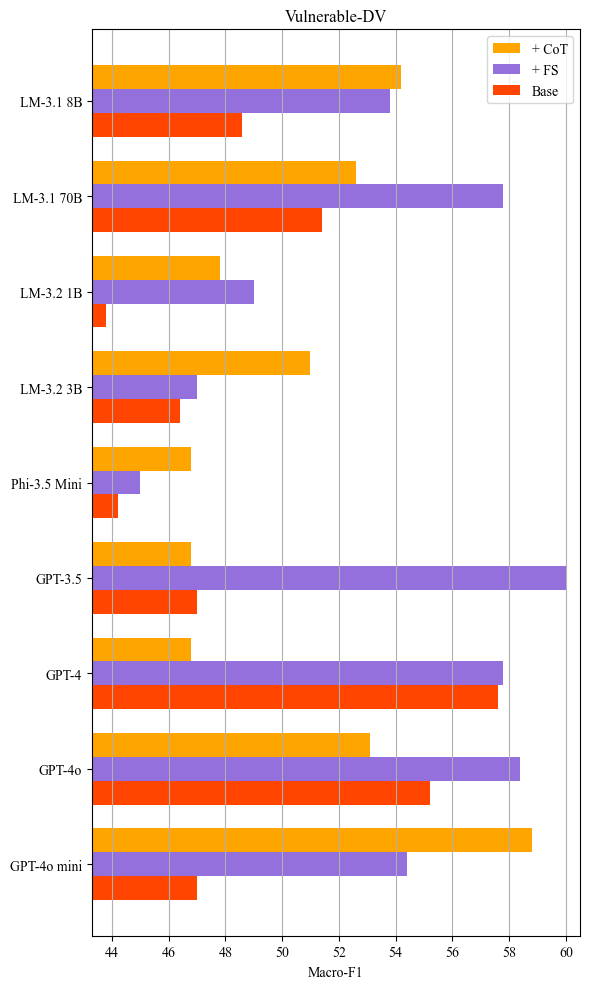

In [76]:
graph=["LM-3.1 8B","LM-3.1 70B", "LM-3.2 1B", "LM-3.2 3B", "Phi-3.5 Mini", "GPT-3.5", "GPT-4","GPT-4o", "GPT-4o mini"]
graph = graph[::-1]

base = result_nocot.loc[11].tolist()[1:]
base = base[::-1]
fewshot = result_nocot.loc[12].tolist()[1:]
fewshot = fewshot[::-1]
cot = result_cot.loc[11].tolist()[2:]
cot = cot[::-1]

all_v = base + fewshot + cot
min_v = min(all_v)
max_v = max(all_v)

ind = np.arange(len(graph))
width = 0.25

fig, ax = plt.subplots(figsize=(6, 10))

ax.barh(ind+ 2* width, cot, width, color='orange', label='+ CoT')
ax.barh(ind + width, fewshot, width, color='mediumpurple', label='+ FS')
ax.barh(ind, base, width, color='orangered', label='Base')

ax.set(yticks=ind + width, yticklabels=graph, ylim=[2*width - 1, len(graph)])
ax.set(xlim=(min_v-0.5, max_v+0.5))
ax.grid(axis = 'x')
ax.set_xlabel("Macro-F1")
# ax.tick_params(axis="y", labelrotation=-30)
ax.legend(loc="upper right")
plt.title("Vulnerable-DV")


plt.tight_layout()

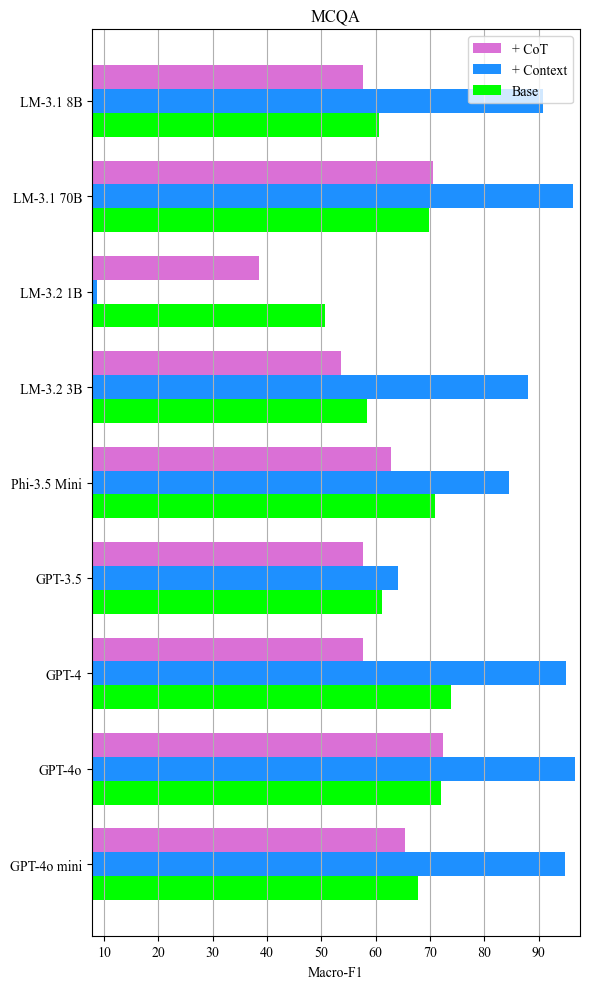

In [89]:
graph=["LM-3.1 8B","LM-3.1 70B", "LM-3.2 1B", "LM-3.2 3B", "Phi-3.5 Mini", "GPT-3.5", "GPT-4","GPT-4o", "GPT-4o mini"]
graph = graph[::-1]

base = result_nocot.loc[13].tolist()[1:]
base = base[::-1]
fewshot = result_nocot.loc[14].tolist()[1:]
fewshot = fewshot[::-1]
cot = result_cot.loc[13].tolist()[2:]
cot = cot[::-1]

all_v = base + fewshot + cot
min_v = min(all_v)
max_v = max(all_v)

ind = np.arange(len(graph))
width = 0.25

fig, ax = plt.subplots(figsize=(6, 10))

ax.barh(ind+ 2* width, cot, width, color='orchid', label='+ CoT')
ax.barh(ind + width, fewshot, width, color='dodgerblue', label='+ Context')
ax.barh(ind, base, width, color='lime', label='Base')

ax.set(yticks=ind + width, yticklabels=graph, ylim=[2*width - 1, len(graph)])
ax.set(xlim=(min_v-1, max_v+1))
ax.grid(axis = 'x')
ax.set_xlabel("Macro-F1")
# ax.tick_params(axis="y", labelrotation=-30)
ax.legend(loc="upper right")
plt.title("MCQA")


plt.tight_layout()

In [ ]:
df = pandas.DataFrame(dict(graph=["LM-3.2 3B", "LM-3.1 70B", "GPT-3.5", "GPT-4o mini", "GPT-4o"],
                           w=[85.80, 88.8, 62.20, 88.4, 89.00], 
                           wo=[53.80, 66.4, 58.80, 65.00, 70.60])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(figsize=(5, 5))
ax.barh(ind + width, df.w, width, color='lightcoral', label='w/ FS')
ax.barh(ind, df.wo, width, color='royalblue', label='w/o FS')

ax.set(yticks=ind + width/2, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.set(xlim=(52, 90))
ax.grid(axis = 'x')
ax.set_xlabel("Macro-F1")
# ax.tick_params(axis="y", labelrotation=-30)
ax.legend(loc="lower right")
plt.title("MCQA")


plt.tight_layout()

In [ ]:
window_size = ["128", "256", "512", "768", "1024"]
auc_window = [72.99, 72.99, 73.21, 73.18, 73.12]


uhs_size = ["8", "16", "32", "48"]
uhs_auc = [73.11, 73.21, 73.14, 73.30]

icb_size = ["2", "4", "8"]
icb_auc = [72.65, 73.21, 72.93]

mask = ["SPAR", "wo random", "wo global", "wo window", "wo sparse"]
mask_auc = [73.21, 72.95, 72.84, 72.76, 72.70]

# plot bar chart
# x axis is window size
# y axis is auc
# y raning from 72.5 to 73.3

#font size 20
plt.rcParams.update({'font.size': 20})

# font is Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(15, 10))


# draw three subplots in one figure
plt.subplot(2, 2, 1)
plt.ylim(72.5, 73.37)
plt.ylabel("AUC", fontsize=30)
plt.bar(uhs_size, uhs_auc, width=0.5, color="green")
plt.xlabel("(a) UIE Codebook Size", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(uhs_auc):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


plt.subplot(2, 2, 2)
plt.ylim(72.5, 73.37)
# turn off y axis
plt.yticks([])
plt.bar(icb_size, icb_auc, width=0.5, color="orange")
plt.xlabel("(b) CCS Codebook Size", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(icb_auc):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


plt.subplot(2, 2, 3)
plt.ylim(72.65, 73.30)
plt.ylabel("AUC", fontsize=30)
plt.bar(window_size, auc_window, width=0.5)
plt.xlabel("(c) Local window Size in Sparase Attention", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(auc_window):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


plt.subplot(2, 2, 4)
plt.ylim(72.65, 73.30)
plt.yticks([])
plt.bar(mask, mask_auc, width=0.5, color="grey")
plt.xlabel("(d) Attention Mechnisms", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(mask_auc):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


# smaller the gap bettween subplots
plt.tight_layout()



In [ ]:
### history length analysis

results = json.load(open("history_analysis_res.json", "r"))

In [ ]:
mind_model = {k: v for k, v in results.items() if k.endswith("mind")}
goodreads_model = {k: v for k, v in results.items() if k.endswith("goodreads")}

In [ ]:
models = {}
for k, v in mind_model.items():
    length = []
    auc = []
    for len, metric in v.items():
        length.append(len)
        auc.append(metric[0]*100)
    models[k] = [length, auc]

In [ ]:
# draw a line chart with multiple lines in one figure
plt.figure(figsize=(8, 10))

x = models["SPAR_mind"][0][::-1]
x = [int(i)*10 for i in x]
y1 = models["SPAR_mind"][1][::-1]
y2 = models["MINER_mind"][1][::-1]
y3 = models["UNBERT_mind"][1][::-1]
y4 = models["UniTRec_mind"][1][::-1]

plt.plot(x, y1, label="SPAR", color="green", linewidth=3, marker="o", markersize=8)
plt.plot(x, y2, label="MINER", color="orange", linewidth=3, marker="o", markersize=8)
plt.plot(x, y3, label="UNBERT", color="darkviolet", linewidth=3, marker="o", markersize=8)
plt.plot(x, y4, label="UniTRec", color="b", linewidth=3, marker="o", markersize=8)

plt.xlabel("History Length", fontsize=30)
plt.ylabel("AUC", fontsize=30)

# y axis range from 67.10 -74.90, y-axis label keep two decimal places
y_ticks = np.arange(67.10, 74.90, 0.55)
plt.yticks(y_ticks, fontsize=24)
plt.xticks(fontsize=24)

# add legend
plt.legend(loc='lower right', fontsize=24)

# add title
plt.title("MIND-small", fontsize=30)

# add grid
plt.grid(True, linestyle='--')
plt.tight_layout()


In [ ]:
models = {}
for k, v in goodreads_model.items():
    length = []
    auc = []
    for len, metric in v.items():
        length.append(len)
        auc.append(metric[0]*100)
    models[k] = [length, auc]

In [ ]:
# draw a line chart with multiple lines in one figure
plt.figure(figsize=(8, 10))

# x = models["SPAR_goodreads"][0][::-1]
x = [int(i) for i in x]
y1 = models["SPAR_goodreads"][1][::-1]
y2 = models["MINER_goodreads"][1][::-1]
y3 = models["UNBERT_goodreads"][1][::-1]
y4 = models["UniTRec_goodreads"][1][::-1]

plt.plot(x, y1, label="SPAR", color="green", linewidth=3, marker="o", markersize=8)
plt.plot(x, y2, label="MINER", color="orange", linewidth=3, marker="o", markersize=8)
plt.plot(x, y3, label="UNBERT", color="darkviolet", linewidth=3, marker="o", markersize=8)
plt.plot(x, y4, label="UniTRec", color="b", linewidth=3, marker="o", markersize=8)

plt.xlabel("History Length", fontsize=30)
plt.ylabel("AUC", fontsize=30)

# y axis range from 67.10 -74.90, y-axis label keep two decimal places, y-axis at right
y_ticks = np.arange(57.50, 61.76, 0.25)
plt.yticks(y_ticks, fontsize=24)
# plt.xticks(fontsize=24

# add legend
plt.legend(loc='lower right', fontsize=24)

# add title
plt.title("Goodreads", fontsize=30)

# add grid
plt.grid(True, linestyle='--')
# legend at right bottom

plt.tight_layout()



In [ ]:
df = pd.DataFrame(results).T

row_sort = ["UNBERT_mind", "MINER_mind", "UniTRec_mind", "SPAR_mind",
            "UNBERT_goodreads", "MINER_goodreads", "UniTRec_goodreads", "SPAR_goodreads"]

df = df.reindex(row_sort)

# rename columns, original * 10
df.columns = [int(i)*10 for i in df.columns]

# change the order of columns
df = df[[i for i in range(10, 70, 10)]]

In [ ]:
# each cell have a list of four values, [auc, mrr, ndcg5, ndcg10]
# convert to four tables, each table has one metric. Keep two decimal places
df_auc = df.applymap(lambda x: round(x[0]*100, 2))
df_mrr = df.applymap(lambda x: round(x[1]*100, 2))
df_ndcg5 = df.applymap(lambda x: round(x[2]*100, 2))
df_ndcg10 = df.applymap(lambda x: round(x[3]*100, 2))



In [ ]:
df_auc.to_csv("auc_history_length.csv")
df_mrr.to_csv("mrr_history_length.csv")
df_ndcg5.to_csv("ndcg5_history_length.csv")
df_ndcg10.to_csv("ndcg10_history_length.csv")

In [ ]:
df_auc

## multiple runs

In [ ]:
results_df = pd.read_csv("./multi_runs.csv")

mind_res = results_df[["model", "AUC", "MRR", "nDCG@5", "nDCG@10"]]
goodread_res = results_df[["model", "AUC.1", "MRR.1", "nDCG@5.1", "nDCG@10.1"]]

In [ ]:
def significance_test(mind_res):

    from collections import defaultdict

    mind_group = defaultdict(lambda: defaultdict(list))

    for i in range(mind_res.shape[0]):
        model = mind_res.iloc[i, 0]
        auc = mind_res.iloc[i, 1]
        mrr = mind_res.iloc[i, 2]
        ndcg5 = mind_res.iloc[i, 3]
        ndcg10 = mind_res.iloc[i, 4]
        mind_group[model]["auc"].append(auc)
        mind_group[model]["mrr"].append(mrr)
        mind_group[model]["ndcg5"].append(ndcg5)
        mind_group[model]["ndcg10"].append(ndcg10)

    # significance test between models
    from scipy.stats import ttest_rel

    # ["MINER", "NAML-PLM", "UNBERT", "UniTRec"] vs Ours
    mind_test_res = defaultdict(lambda: defaultdict(float))
    for model in mind_group:
        if model == "Ours":
            continue
        for metric in mind_group[model]:
            t, p = ttest_rel(mind_group[model][metric], mind_group["Ours"][metric])

            mind_test_res[model][metric] = p

    mind_test_res_df = pd.DataFrame(mind_test_res)
    return mind_test_res_df
        

In [ ]:
significance_test(mind_res)

In [ ]:
significance_test(goodread_res)

In [ ]:
# group by model
results_df = pd.read_csv("./multi_runs.csv")
results_df_mean = results_df.groupby("model").mean()
results_df_std = results_df.groupby("model").std()

model_order = ["NAML", "NRMS", "Fastformer", "CAUM", "MINS", "NAML-PLM", "UNBERT", "MINER", "UniTRec", "Ours"]

results_df_mean = results_df_mean.reindex(model_order)
results_df_std = results_df_std.reindex(model_order)
results_df_median = results_df.groupby("model").median().reindex(model_order)

In [ ]:
results_df_mean

In [ ]:
results_df_std

In [ ]:
results_df_median

In [ ]:
lamda = ["0.05", "0.1", "0.3"]
auc_lamda = [70.76, 70.55, 70.47]


upe_size = ["16", "32", "48"]
upe_auc = [70.46, 70.76, 70.58]

cpe_size = ["2", "4", "8"]
cpe_auc = [70.43, 70.76, 70.56]


# plot bar chart
# x axis is window size
# y axis is auc
# y raning from 72.5 to 73.3

#font size 20
plt.rcParams.update({'font.size': 20})

# font is Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(18, 8))


# draw three subplots in one figure
plt.subplot(1, 3, 1)
plt.ylim(70.35, 70.78)
plt.ylabel("AUC", fontsize=30)
plt.bar(lamda, auc_lamda, width=0.5, color="green")
plt.xlabel("(a) $\lambda$", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(auc_lamda):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


plt.subplot(1, 3, 2)
plt.ylim(70.35, 70.78)
# turn off y axis
plt.yticks([])
plt.bar(upe_size, upe_auc, width=0.5, color="orange")
plt.xlabel("(b) UPE Size", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(upe_auc):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


plt.subplot(1, 3, 3)
plt.ylim(70.35, 70.78)
# plt.ylabel("AUC", fontsize=30)
plt.yticks([])
plt.bar(cpe_size, cpe_auc, width=0.5)
plt.xlabel("(c) CPE Size", fontsize=30)
# add data label, keep two decimal places
for x, y in enumerate(cpe_auc):
    plt.text(x, y, '%0.2f' % round(y, 2), ha='center', va='bottom')


# smaller the gap bettween subplots
plt.tight_layout()

